(461830, 14)

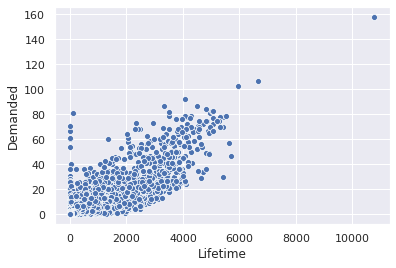

In [1]:
from joblib import dump
import numpy as np
import pandas as pd
from pathlib import Path
import datetime
import logging
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.CRITICAL,format='%(asctime)s - %(levelname)s - %(message)s')

### Regression based on historical data

### Determine paths to datasets and load into pandas dataframe
cleaned_folder = Path("../data/cleaned")
processed_folder = Path("../data/processed")
labelled_titles = processed_folder / 'expanded_feature_labels_for_each_title.csv'
file_to_open = cleaned_folder / 'by_titles.csv'

df1 = pd.read_csv(labelled_titles)
df = pd.read_csv(file_to_open)

df1.columns
sns.set()

sns.scatterplot(df['Lifetime'],df['Demanded'])

df.shape

In [2]:
### Maximum number of demands for titles
max(df['Demanded'].unique())

158.0

In [3]:
df['Demanded'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
461825    0.0
461826    0.0
461827    0.0
461828    0.0
461829    0.0
Name: Demanded, Length: 461830, dtype: float64>

In [4]:
df.groupby('Langue')['Demanded'].sum()

Langue
aar         4.0
ang         1.0
ara        21.0
bad         1.0
ben         0.0
bik         0.0
chi        66.0
cpe         0.0
cpf         0.0
cze         1.0
dak         4.0
dut         1.0
efi         0.0
eng     26574.0
fan         1.0
fin         0.0
fre    205588.0
frm         0.0
fro         0.0
ger         1.0
grc         0.0
gre         0.0
hai         0.0
hat         4.0
iku         0.0
ind         0.0
ita        79.0
jav         0.0
jpn         1.0
kaa         0.0
lat         1.0
mis         0.0
mul         7.0
paa         2.0
pan         0.0
per         2.0
pol         5.0
por         0.0
que         2.0
raj         2.0
rum        16.0
rus        50.0
sad         0.0
scc         0.0
slo         1.0
spa        82.0
ssa         5.0
tah         2.0
tgl         2.0
tur         1.0
udm         0.0
und         3.0
urd         1.0
vai         0.0
vie         0.0
xal         3.0
zxx         1.0
Name: Demanded, dtype: float64

In [5]:
df.groupby('Langue')['Demanded'].mean()

Langue
aar    1.000000
ang    0.500000
ara    0.241379
bad    0.500000
ben    0.000000
bik    0.000000
chi    0.199396
cpe    0.000000
cpf    0.000000
cze    0.500000
dak    1.000000
dut    1.000000
efi    0.000000
eng    0.191888
fan    1.000000
fin    0.000000
fre    0.642850
frm    0.000000
fro    0.000000
ger    0.058824
grc    0.000000
gre    0.000000
hai    0.000000
hat    0.075472
iku    0.000000
ind    0.000000
ita    0.043335
jav    0.000000
jpn    0.200000
kaa    0.000000
lat    0.200000
mis    0.000000
mul    0.250000
paa    0.666667
pan    0.000000
per    0.500000
pol    0.454545
por    0.000000
que    0.666667
raj    2.000000
rum    0.484848
rus    0.250000
sad    0.000000
scc    0.000000
slo    1.000000
spa    0.149362
ssa    5.000000
tah    1.000000
tgl    0.007547
tur    0.250000
udm    0.000000
und    0.166667
urd    1.000000
vai    0.000000
vie    0.000000
xal    1.500000
zxx    0.111111
Name: Demanded, dtype: float64

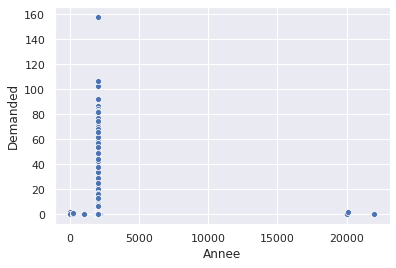

In [6]:
sns.scatterplot(df['Annee'],df['Demanded'])
### Some outliers in terms of years


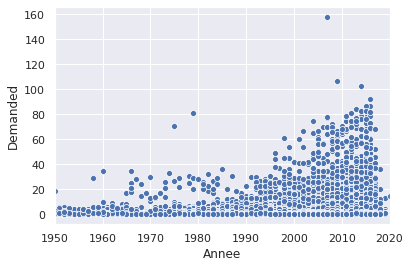

In [7]:
plot = sns.scatterplot(df['Annee'],df['Demanded'])
plot.set(xlim=(1950, 2020))
plt.savefig('Year_demand.png')

[(0, 2.5), (1950, 2019)]

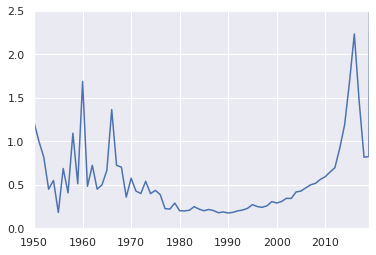

In [8]:
plot = sns.lineplot(data=df.groupby('Annee')['Demanded'].mean())
plot.set(xlim=(1950, 2019),ylim=(0,2.5))